In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report

In [15]:
data = pd.read_csv('data/Caravan.csv').drop(columns='Unnamed: 0')
data['Purchase'] = [0 if x == 'No' else 1 for x in data['Purchase']]
data

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = data.drop(columns='Purchase')
y = data['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1000, shuffle=False, random_state=None)

In [25]:
# Create Boosting 
boosting = GradientBoostingClassifier(n_estimators=1000, max_depth=3, learning_rate=0.01, random_state=1)
boosting.fit(X_train, y_train)

# Return Accuracy
print('Accuracy training score: {:.4f}.\n'.format(boosting.score(X_train, y_train)))

# Calculate Accuracy
print('Accuracy test score: {:.4f}.\n'.format(boosting.score(X_test, y_test)))

# Calculate test error on test set
y_pred = boosting.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
clf_pred_result = pd.DataFrame(matrix, index=['No', 'Yes'], columns=['Pred No', 'Pred Yes'])

# Print result
print(clf_pred_result)
print('')
print(classification_report(y_test, y_pred))

Accuracy training score: 0.9720.

Accuracy test score: 0.9334.

     Pred No  Pred Yes
No      4487        46
Yes      275        14

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4533
           1       0.23      0.05      0.08       289

    accuracy                           0.93      4822
   macro avg       0.59      0.52      0.52      4822
weighted avg       0.90      0.93      0.91      4822



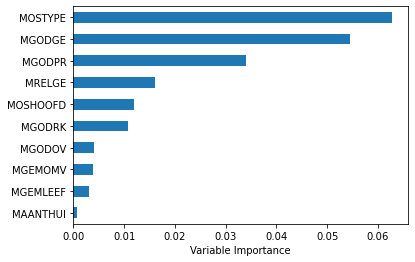

In [29]:
# Create feature importances
feature_importances = pd.DataFrame(boosting.feature_importances_[:10], index=X.columns[:10], columns=['Importance']).sort_values(by='Importance').plot(kind='barh')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [39]:
threshold = 0.2
y_prob = boosting.predict_proba(X_test)[:,1]
y_pred_2 = [1 if x > threshold else 0 for x in y_prob]

matrix = confusion_matrix(y_test, y_pred_2)
clf_pred_result = pd.DataFrame(matrix, index=['No', 'Yes'], columns=['Pred No', 'Pred Yes'])

# Print result
print('Accuracy: {:.4f}.\n'.format((matrix[0][0]+ matrix[1][1])/(matrix.sum())))
print(clf_pred_result)
print('')
print(classification_report(y_test, y_pred))

Accuracy: 0.9073.

     Pred No  Pred Yes
No      4336       197
Yes      250        39

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4533
           1       0.23      0.05      0.08       289

    accuracy                           0.93      4822
   macro avg       0.59      0.52      0.52      4822
weighted avg       0.90      0.93      0.91      4822



In [40]:
# Accuracy lower with threshold 20%

In [43]:
print('True Possive result: {:.4f}'.format(39/289))

True Possive result: 0.1349
